1: When compared to NYC covid daily cases #’s and death#’s, Can a model be built with 90% confidence that can predict the number of NYC taxi transactions that will take place in that day? How does a model built off of the start of the pandemics data compare accuracy-wise to recent months? Furthermore, could this data be further applied in the future? Why or why not?


In [2]:
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split # simple TT split cv


## a) ##

In [3]:
CovidSet= pd.read_csv("covidDataByDay.csv")
TaxiJulySet= pd.read_csv("yellow_tripdata_2021-07.csv")

In [4]:
TaxiJulySet.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2021-07-01 00:08:51   2021-07-01 00:13:05              1.0   
1       1.0  2021-07-01 00:22:39   2021-07-01 00:25:58              1.0   
2       1.0  2021-07-01 00:48:33   2021-07-01 00:54:58              1.0   
3       1.0  2021-07-01 00:59:44   2021-07-01 01:07:09              1.0   
4       1.0  2021-07-01 00:08:35   2021-07-01 00:16:28              0.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.8         1.0                  N            90            68   
1            0.9         1.0                  N           113            90   
2            2.8         1.0                  N            88           232   
3            1.4         1.0                  N            79           249   
4            2.0         1.0                  N           142           238   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0          5.0    3.0      0.5         0.0           0.0   
1           2.0          5.0    3.0      0.5         0.0           0.0   
2           2.0         10.0    3.0      0.5         0.0           0.0   
3           1.0          7.0    3.0      0.5         1.5           0.0   
4           1.0          8.5    3.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3           8.8                   2.5  
1                    0.3           8.8                   2.5  
2                    0.3          13.8                   2.5  
3                    0.3          12.3                   2.5  
4                    0.3          12.3                   2.5

In [5]:
CovidSet.head()

date_of_interest  CASE_COUNT  PROBABLE_CASE_COUNT  HOSPITALIZED_COUNT  \
0       02/29/2020           1                    0                   1   
1       03/01/2020           0                    0                   1   
2       03/02/2020           0                    0                   2   
3       03/03/2020           1                    0                   7   
4       03/04/2020           5                    0                   2   

   DEATH_COUNT  PROBABLE_DEATH_COUNT  CASE_COUNT_7DAY_AVG  \
0            0                     0                    0   
1            0                     0                    0   
2            0                     0                    0   
3            0                     0                    0   
4            0                     0                    0   

   ALL_CASE_COUNT_7DAY_AVG  HOSP_COUNT_7DAY_AVG  DEATH_COUNT_7DAY_AVG  ...  \
0                        0                    0                     0  ...   
1                        0                    0                     0  ...   
2                        0                    0                     0  ...   
3                        0                    0                     0  ...   
4                        0                    0                     0  ...   

   SI_HOSPITALIZED_COUNT  SI_DEATH_COUNT  SI_PROBABLE_DEATH_COUNT  \
0                      0               0                        0   
1                      0               0                        0   
2                      0               0                        0   
3                      0               0                        0   
4                      0               0                        0   

   SI_CASE_COUNT_7DAY_AVG  SI_PROBABLE_CASE_COUNT_7DAY_AVG  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   

   SI_ALL_CASE_COUNT_7DAY_AVG  SI_HOSPITALIZED_COUNT_7DAY_AVG  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   SI_DEATH_COUNT_7DAY_AVG  SI_ALL_DEATH_COUNT_7DAY_AVG  INCOMPLETE  
0                        0                            0           0  
1                        0                            0           0  
2                        0                            0           0  
3                        0                            0           0  
4                        0                            0           0  

[5 rows x 67 columns]

In [6]:
TaxiJulySet['tpep_pickup_datetime'] = pd.to_datetime(TaxiJulySet['tpep_pickup_datetime']).dt.date
CovidSet['date_of_interest'] = pd.to_datetime(CovidSet['date_of_interest']).dt.date
TaxiJulySet=TaxiJulySet.rename(columns={"tpep_pickup_datetime": "date"})
CovidSet=CovidSet.rename(columns={"date_of_interest": "date"})

In [7]:
TaxiTransactionAmmount = pd.DataFrame(TaxiJulySet.groupby(['date']).count())
TaxiTransactionAmmount = TaxiTransactionAmmount.rename(columns={"VendorID": "Count"})
TaxiTransactionAmmount = TaxiTransactionAmmount["Count"]
mergeSet = CovidSet.merge(TaxiTransactionAmmount.rename('Transaction Count'), on='date', how='inner')

In [8]:
mergeSet = mergeSet[["date","CASE_COUNT","HOSPITALIZED_COUNT","DEATH_COUNT","Transaction Count"]]

In [9]:
mergeSet.tail()

date  CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  Transaction Count
29  2021-07-29        1284                  74            8              94719
30  2021-07-30        1277                  79           10              94158
31  2021-07-31         850                  67            4              88400
32  2021-08-01         828                  46           11                 30
33  2021-08-02        1565                  72            4                  1

## 6 month Version ##

In [10]:
CovidSet= pd.read_csv("covidDataByDay.csv")
TaxiJulySet= pd.read_csv("yellow_tripdata_2021-07.csv")
TaxiJuneSet= pd.read_csv("yellow_tripdata_2021-06.csv")
TaxiMaySet= pd.read_csv("yellow_tripdata_2021-05.csv")
TaxiAprilSet= pd.read_csv("yellow_tripdata_2021-04.csv")
TaxiMarchSet= pd.read_csv("yellow_tripdata_2021-03.csv")
TaxiFebuarySet= pd.read_csv("yellow_tripdata_2021-02.csv")

In [11]:
bigSet = pd.concat([TaxiJulySet,TaxiJuneSet,TaxiMaySet,TaxiAprilSet,TaxiMarchSet,TaxiFebuarySet],axis = 0)
bigSet.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2021-07-01 00:08:51   2021-07-01 00:13:05              1.0   
1       1.0  2021-07-01 00:22:39   2021-07-01 00:25:58              1.0   
2       1.0  2021-07-01 00:48:33   2021-07-01 00:54:58              1.0   
3       1.0  2021-07-01 00:59:44   2021-07-01 01:07:09              1.0   
4       1.0  2021-07-01 00:08:35   2021-07-01 00:16:28              0.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.8         1.0                  N            90            68   
1            0.9         1.0                  N           113            90   
2            2.8         1.0                  N            88           232   
3            1.4         1.0                  N            79           249   
4            2.0         1.0                  N           142           238   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0          5.0    3.0      0.5         0.0           0.0   
1           2.0          5.0    3.0      0.5         0.0           0.0   
2           2.0         10.0    3.0      0.5         0.0           0.0   
3           1.0          7.0    3.0      0.5         1.5           0.0   
4           1.0          8.5    3.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3           8.8                   2.5  
1                    0.3           8.8                   2.5  
2                    0.3          13.8                   2.5  
3                    0.3          12.3                   2.5  
4                    0.3          12.3                   2.5

In [12]:
CovidSet.head()

date_of_interest  CASE_COUNT  PROBABLE_CASE_COUNT  HOSPITALIZED_COUNT  \
0       02/29/2020           1                    0                   1   
1       03/01/2020           0                    0                   1   
2       03/02/2020           0                    0                   2   
3       03/03/2020           1                    0                   7   
4       03/04/2020           5                    0                   2   

   DEATH_COUNT  PROBABLE_DEATH_COUNT  CASE_COUNT_7DAY_AVG  \
0            0                     0                    0   
1            0                     0                    0   
2            0                     0                    0   
3            0                     0                    0   
4            0                     0                    0   

   ALL_CASE_COUNT_7DAY_AVG  HOSP_COUNT_7DAY_AVG  DEATH_COUNT_7DAY_AVG  ...  \
0                        0                    0                     0  ...   
1                        0                    0                     0  ...   
2                        0                    0                     0  ...   
3                        0                    0                     0  ...   
4                        0                    0                     0  ...   

   SI_HOSPITALIZED_COUNT  SI_DEATH_COUNT  SI_PROBABLE_DEATH_COUNT  \
0                      0               0                        0   
1                      0               0                        0   
2                      0               0                        0   
3                      0               0                        0   
4                      0               0                        0   

   SI_CASE_COUNT_7DAY_AVG  SI_PROBABLE_CASE_COUNT_7DAY_AVG  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   

   SI_ALL_CASE_COUNT_7DAY_AVG  SI_HOSPITALIZED_COUNT_7DAY_AVG  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   SI_DEATH_COUNT_7DAY_AVG  SI_ALL_DEATH_COUNT_7DAY_AVG  INCOMPLETE  
0                        0                            0           0  
1                        0                            0           0  
2                        0                            0           0  
3                        0                            0           0  
4                        0                            0           0  

[5 rows x 67 columns]

In [13]:
bigSet['tpep_pickup_datetime'] = pd.to_datetime(bigSet['tpep_pickup_datetime']).dt.date
CovidSet['date_of_interest'] = pd.to_datetime(CovidSet['date_of_interest']).dt.date
bigSet=bigSet.rename(columns={"tpep_pickup_datetime": "date"})
CovidSet=CovidSet.rename(columns={"date_of_interest": "date"})

In [14]:
TaxiTransactionAmmount = pd.DataFrame(bigSet.groupby(['date']).count())
TaxiTransactionAmmount = TaxiTransactionAmmount.rename(columns={"VendorID": "Count"})
TaxiTransactionAmmount = TaxiTransactionAmmount["Count"]
mergeSet = CovidSet.merge(TaxiTransactionAmmount.rename('Transaction Count'), on='date', how='inner')

In [15]:
mergeSet = mergeSet[["date","CASE_COUNT","HOSPITALIZED_COUNT","DEATH_COUNT","Transaction Count"]]
mergeSet.head()

date  CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  Transaction Count
0  2021-01-31        2891                 304           74                  8
1  2021-02-01         975                 288           65               5612
2  2021-02-02        2660                 404           77              27090
3  2021-02-03        5143                 442           75              51470
4  2021-02-04        4855                 432           90              54460

In [16]:
predictors = ["CASE_COUNT","HOSPITALIZED_COUNT","DEATH_COUNT"]

testSplitDecimal = .20
X_train, X_test, y_train, y_test = train_test_split(mergeSet[predictors], mergeSet["Transaction Count"],
                                                    test_size=testSplitDecimal)

zScore = StandardScaler()

zScore.fit(X_train)
Xz_train = zScore.transform(X_train)
Xz_test = zScore.transform(X_test)


lr = LinearRegression()
lr.fit(Xz_train,y_train)

y_pred = lr.predict(Xz_test)
y_predTrain = lr.predict(Xz_train)


testMSE = mean_squared_error(y_test,y_pred)
trainMSE = mean_squared_error(y_train,y_predTrain)

testr2 = r2_score(y_test,y_pred)
trainr2 = r2_score(y_train,y_predTrain)

In [17]:
print("TEST")
print(testMSE)
print(testr2)

print("TRAIN")
print(trainMSE)
print(trainr2)


predVtrueTrain = pd.DataFrame({"True":y_train,"Pred":y_predTrain})
predVtrueTest = pd.DataFrame({"True":y_test,"Pred":y_pred})
predVtrueTrain.head()
predVtrueTest.head()

TEST
712557715.3220748
-0.014063573422169684
TRAIN
330416691.9526771
0.34099204364360947


True          Pred
28   35407  58130.158428
189      3  83714.745937
32   62581  53837.514958
44   60843  64229.839787
127  85036  80911.702525

In [18]:
coefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
coefficients = coefficients.append(pd.DataFrame([[lr.intercept_, "intercept"]], columns=["Coef","Name"], index=[4]))
print(coefficients)

           Coef                Name
0   7921.622196          CASE_COUNT
1 -23080.163054  HOSPITALIZED_COUNT
2   2770.567766         DEATH_COUNT
4  69965.296053           intercept


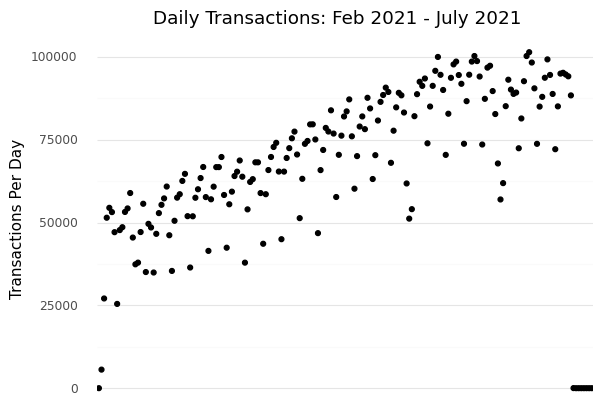

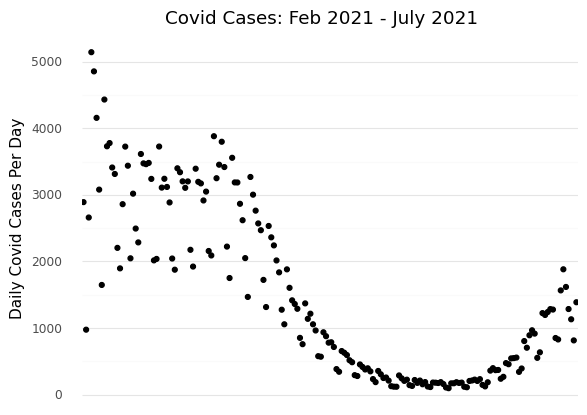

In [19]:
plot1 = (ggplot(mergeSet, aes(x = "date", y = "Transaction Count")) + geom_point()+
    theme_minimal()+
    labs(x = "", y = "Transactions Per Day")+
    ggtitle("Daily Transactions: Feb 2021 - July 2021")+
    theme(panel_grid_major_x = element_blank(),
        axis_title_x=element_blank(),
        axis_text_x=element_blank())
     )

plot2 = (ggplot(mergeSet, aes(x = "date", y = "CASE_COUNT")) + geom_point()+
    theme_minimal()+
    labs(x = "", y = "Daily Covid Cases Per Day")+
    ggtitle("Covid Cases: Feb 2021 - July 2021")+
    theme(panel_grid_major_x = element_blank(),
        axis_title_x=element_blank(),
        axis_text_x=element_blank())
     )
print(plot1)
print(plot2)

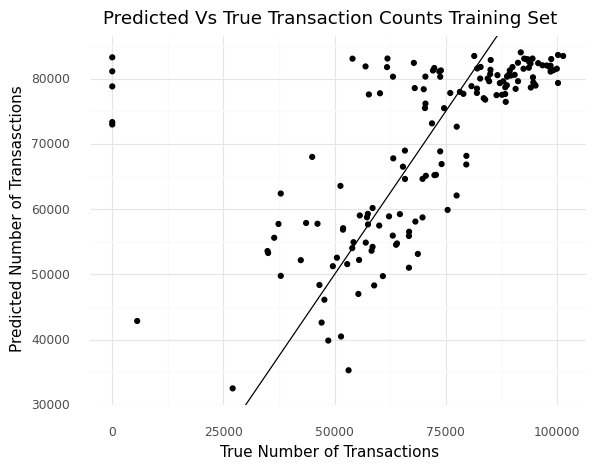

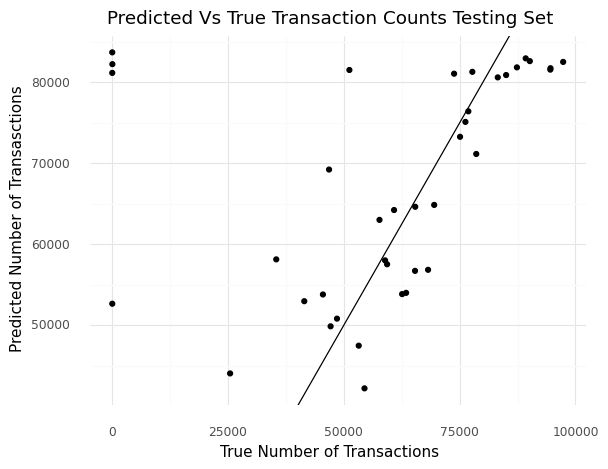

In [20]:
plot3 = (ggplot(predVtrueTrain, aes(x = "True", y = "Pred")) + geom_point()+geom_abline()+
    theme_minimal()+
    labs(x = "True Number of Transactions", y = "Predicted Number of Transasctions")+
    ggtitle("Predicted Vs True Transaction Counts Training Set"))

plot4 = (ggplot(predVtrueTest, aes(x = "True", y = "Pred")) + geom_point()+geom_abline()+
    theme_minimal()+
    labs(x = "True Number of Transactions", y = "Predicted Number of Transasctions")+
    ggtitle("Predicted Vs True Transaction Counts Testing Set"))
print(plot3)
print(plot4)

## 6 Month Data Start of Covid ##

In [21]:
CovidSet= pd.read_csv("covidDataByDay.csv")
TaxiMarchSet= pd.read_csv("yellow_tripdata_2020-03.csv")
TaxiAprilSet= pd.read_csv("yellow_tripdata_2020-04.csv")
TaxiMaySet= pd.read_csv("yellow_tripdata_2020-05.csv")
TaxiJuneSet= pd.read_csv("yellow_tripdata_2020-06.csv")
TaxiJulySet= pd.read_csv("yellow_tripdata_2020-07.csv")
TaxiAugustSet= pd.read_csv("yellow_tripdata_2020-08.csv")

In [22]:
bigSet = pd.concat([TaxiMarchSet, TaxiAprilSet, TaxiMaySet, TaxiJuneSet, TaxiJulySet, TaxiAugustSet],axis = 0)
bigSet.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-03-01 00:31:13   2020-03-01 01:01:42              1.0   
1       2.0  2020-03-01 00:08:22   2020-03-01 00:08:49              1.0   
2       1.0  2020-03-01 00:52:18   2020-03-01 00:59:16              1.0   
3       2.0  2020-03-01 00:47:53   2020-03-01 00:50:57              2.0   
4       1.0  2020-03-01 00:43:19   2020-03-01 00:58:27              0.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.70         1.0                  N            88           255   
1           0.00         1.0                  N           193           193   
2           1.10         1.0                  N           246            90   
3           0.87         1.0                  N           151           238   
4           4.40         1.0                  N            79           261   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0         22.0    3.0      0.5        2.00           0.0   
1           2.0          2.5    0.5      0.5        0.00           0.0   
2           1.0          6.0    3.0      0.5        1.95           0.0   
3           1.0          5.0    0.5      0.5        1.76           0.0   
4           1.0         16.5    3.0      0.5        4.05           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         27.80                   2.5  
1                    0.3          3.80                   0.0  
2                    0.3         11.75                   2.5  
3                    0.3         10.56                   2.5  
4                    0.3         24.35                   2.5

In [23]:
bigSet['tpep_pickup_datetime'] = pd.to_datetime(bigSet['tpep_pickup_datetime']).dt.date
CovidSet['date_of_interest'] = pd.to_datetime(CovidSet['date_of_interest']).dt.date
bigSet=bigSet.rename(columns={"tpep_pickup_datetime": "date"})
CovidSet=CovidSet.rename(columns={"date_of_interest": "date"})

In [24]:
TaxiTransactionAmmount = pd.DataFrame(bigSet.groupby(['date']).count())
TaxiTransactionAmmount = TaxiTransactionAmmount.rename(columns={"VendorID": "Count"})
TaxiTransactionAmmount = TaxiTransactionAmmount["Count"]
mergeSet = CovidSet.merge(TaxiTransactionAmmount.rename('Transaction Count'), on='date', how='inner')

In [25]:
mergeSet = mergeSet[["date","CASE_COUNT","HOSPITALIZED_COUNT","DEATH_COUNT","Transaction Count"]]
mergeSet.head()

date  CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  Transaction Count
0  2020-02-29           1                   1            0                271
1  2020-03-01           0                   1            0             178339
2  2020-03-02           0                   2            0             191558
3  2020-03-03           1                   7            0             220687
4  2020-03-04           5                   2            0             227511

In [26]:
predictors = ["CASE_COUNT","HOSPITALIZED_COUNT","DEATH_COUNT"]

testSplitDecimal = .20
X_train, X_test, y_train, y_test = train_test_split(mergeSet[predictors], mergeSet["Transaction Count"],
                                                    test_size=testSplitDecimal)

zScore = StandardScaler()

zScore.fit(X_train)
Xz_train = zScore.transform(X_train)
Xz_test = zScore.transform(X_test)


lr = LinearRegression()
lr.fit(Xz_train,y_train)

y_pred = lr.predict(Xz_test)
y_predTrain = lr.predict(Xz_train)


testMSE = mean_squared_error(y_test,y_pred)
trainMSE = mean_squared_error(y_train,y_predTrain)

testr2 = r2_score(y_test,y_pred)
trainr2 = r2_score(y_train,y_predTrain)

In [27]:
print("TEST")
print(testMSE)
print(testr2)

print("TRAIN")
print(trainMSE)
print(trainr2)


predVtrueTrain = pd.DataFrame({"True":y_train,"Pred":y_predTrain})
predVtrueTest = pd.DataFrame({"True":y_test,"Pred":y_pred})
predVtrueTrain.head()
predVtrueTest.head()

TEST
1823630743.18898
0.13568260674162025
TRAIN
1973402721.7239041
0.09717129852660888


True          Pred
168   27593  39792.426415
128   22560  36773.859894
138   26967  36208.164207
9    173500  42134.927121
47     7843  -2962.059663

In [28]:
coefficients = pd.DataFrame({"Coef":lr.coef_,
              "Name": predictors})
coefficients = coefficients.append(pd.DataFrame([[lr.intercept_, "intercept"]], columns=["Coef","Name"], index=[4]))
print(coefficients)

           Coef                Name
0 -24475.248544          CASE_COUNT
1  21074.778423  HOSPITALIZED_COUNT
2  -9641.344192         DEATH_COUNT
4  28977.788079           intercept


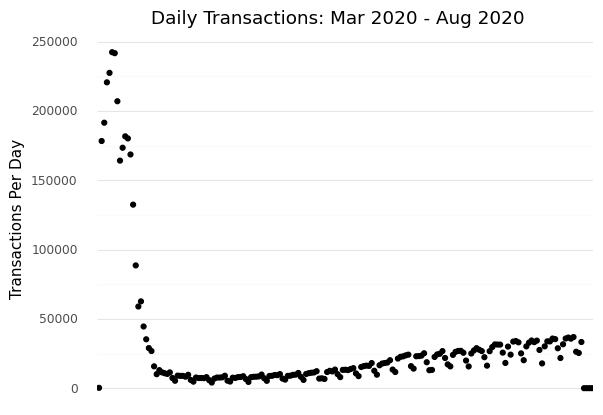

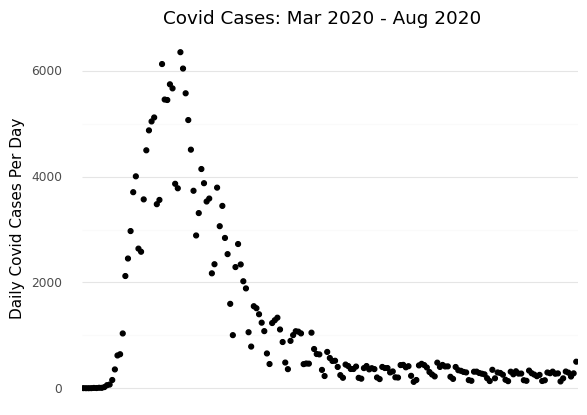

In [29]:
plot5 = (ggplot(mergeSet, aes(x = "date", y = "Transaction Count")) + geom_point()+
    theme_minimal()+
    labs(x = "", y = "Transactions Per Day")+
    ggtitle("Daily Transactions: Mar 2020 - Aug 2020")+
    theme(panel_grid_major_x = element_blank(),
        axis_title_x=element_blank(),
        axis_text_x=element_blank())
     )

plot6 = (ggplot(mergeSet, aes(x = "date", y = "CASE_COUNT")) + geom_point()+
    theme_minimal()+
    labs(x = "", y = "Daily Covid Cases Per Day")+
    ggtitle("Covid Cases: Mar 2020 - Aug 2020")+
    theme(panel_grid_major_x = element_blank(),
        axis_title_x=element_blank(),
        axis_text_x=element_blank())
     )

print(plot5)
print(plot6)

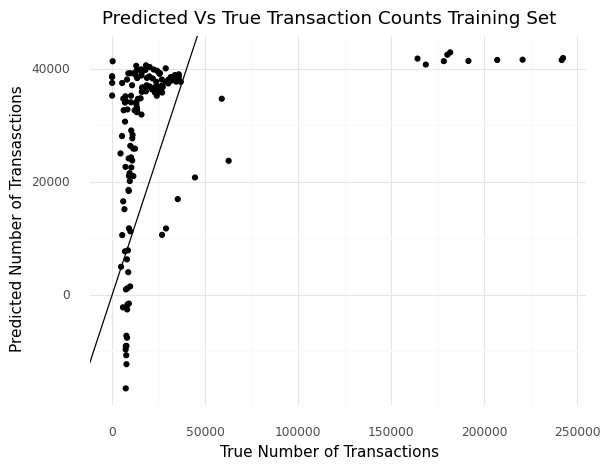

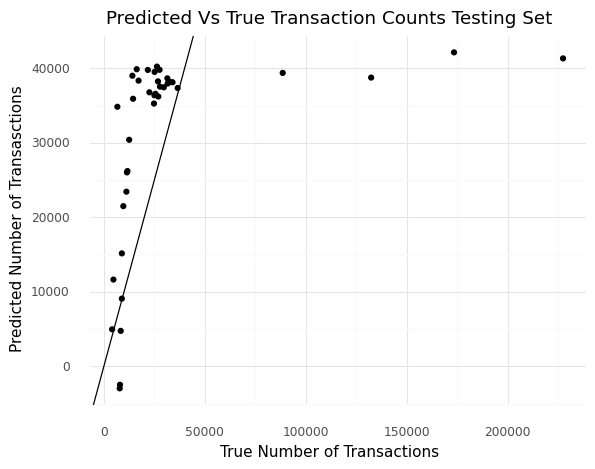

In [30]:
plot7 = (ggplot(predVtrueTrain, aes(x = "True", y = "Pred")) + geom_point()+geom_abline()+
    theme_minimal()+
    labs(x = "True Number of Transactions", y = "Predicted Number of Transasctions")+
    ggtitle("Predicted Vs True Transaction Counts Training Set"))

plot8 = (ggplot(predVtrueTest, aes(x = "True", y = "Pred")) + geom_point()+geom_abline()+
    theme_minimal()+
    labs(x = "True Number of Transactions", y = "Predicted Number of Transasctions")+
    ggtitle("Predicted Vs True Transaction Counts Testing Set"))

print(plot7)
print(plot8)

## b) ##
I was not able to make a model with any reasonable success that can predicted the taxi transaction count for a day given covid death and case info.

In terms of model comparisons from the start of Covid-19 to current data. The performance of the model built off the data at the start of the pandemic was even more poor than the performance of the current data. This was seen by the increase in MSE and decrease in r2 when moving from the current data to begining of pandemic data

I would state that COVID-19 data is not able to give a good day by day taxi transaction count.

## c) ##

The first graph below is the models predictions on the y axis and the true values on the x axis for the 6 months of current data. That graph is only the data that the model saw when it was created

The second graph is also showing predictions vs true values but this time with the unseen day from the current 6 month perdiod. This is indicidive of model performance 

Feb 2021 - July 2021

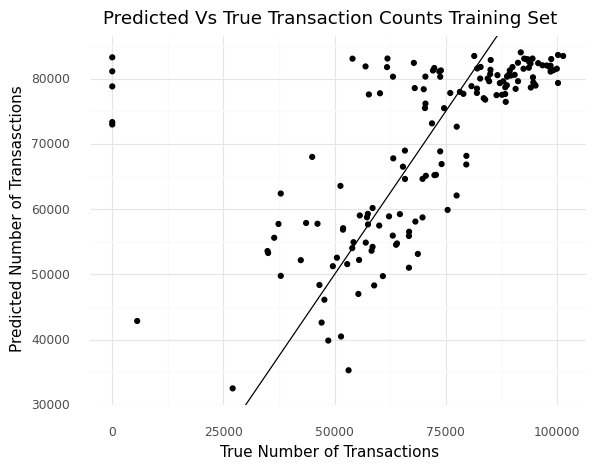

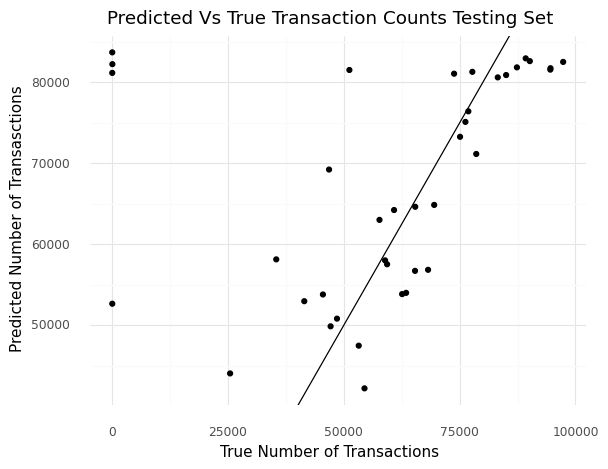

In [31]:
print(plot3)
print(plot4)

The first graph below is the transaction count per day modeled against time on the x axis. You can see the upward trend over time of the taxi industry.

The second graph is showing the of covid cases found in NYC on that day modeled against time on the x axis. This is the fall of the second holiday peak of covid and then the summer months afterward.

Feb 2021 - July 2021

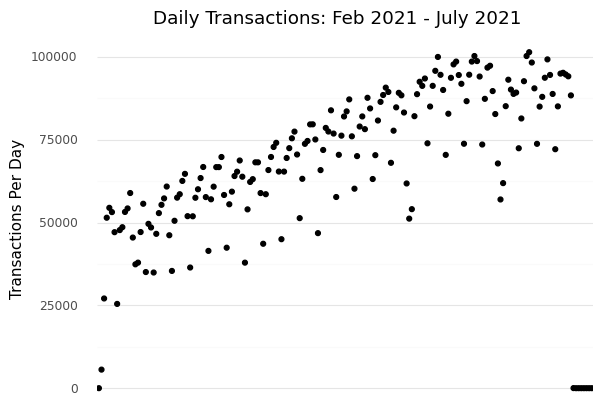

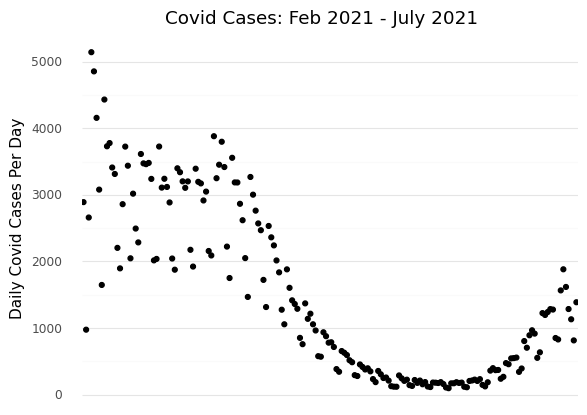

In [32]:
print(plot1)
print(plot2)

The first graph below is the models predictions on the y axis and the true values on the x axis for the 6 months of the *start of covid* data. That graph is only the data that the model saw when it was created

The second graph is also showing predictions vs true values but this time with the unseen day from the *start of covid* 6 month perdiod. This is indicidive of model performance 

Mar 2020 - Aug 2020

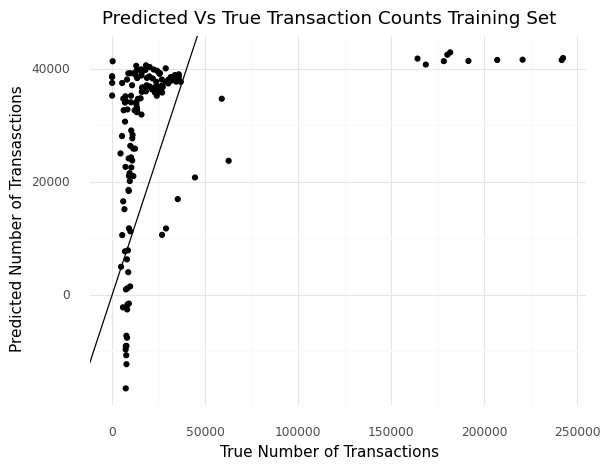

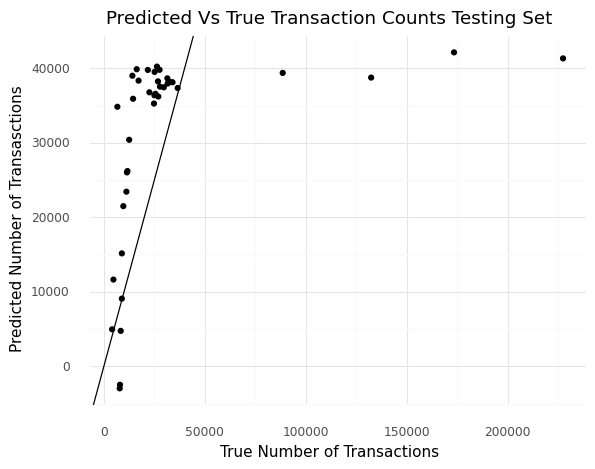

In [33]:
print(plot7)
print(plot8)

The first graph below is the transaction count per day modeled against time on the x axis. Here you can see the steep decline of taxi transactions from the normal level of ~200000 daily transactions to the start of the pandemic

The second graph is showing the of covid cases found in NYC on that day modeled against time on the x axis. This is the initial peak of covid cases in mid 2020

Mar 2020 - Aug 2020

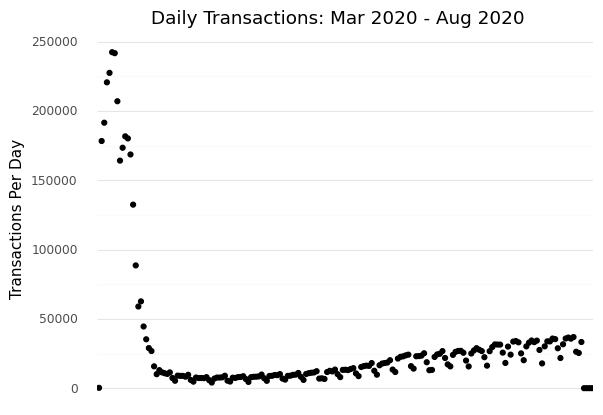

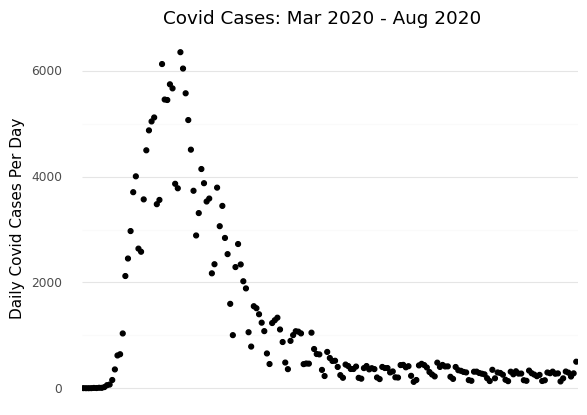

In [34]:
print(plot5)
print(plot6)